In [119]:
from matplotlib import pyplot as plt
import pandas as pd

In [120]:
#Obtain original data

df = pd.read_csv('dfPrint_semana4.csv')
data = df
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(5)

,date,league,local_team,visit_team,home_win,visitor_win,tie,exp_goals,exp_goals_prob,total_goals,home_goals,visitor_goals
0,04-19,Serie A,Genoa,Lazio,0.3062,0.4469,0.2467,1.5,0.7777,2.85,1.27,1.58
1,04-19,Serie A,Cagliari,Juventus,0.1631,0.6213,0.2147,1.5,0.7690,2.80,0.87,1.93
2,04-19,Bundesliga,Eintracht Frankfurt,Augsburg,0.5060,0.2415,0.2523,1.5,0.7288,2.58,1.58,1.00
3,04-19,La Liga,Athletic Club,Granada,0.8632,0.0326,0.0721,2.5,0.8012,4.29,3.63,0.66
4,04-19,Ligue 1,Nice,Lorient,0.6192,0.1379,0.2426,1.5,0.6550,2.24,1.62,0.61


In [121]:
# Rewrite data in the style for the publication

df2 = pd.DataFrame()

df2['Date'] = df['date']
df2['League'] = df['league']
df2['Match'] = df['local_team'] + ' vs ' + df['visit_team']

df2['Home Win'] = (df['home_win']*100).round(2).apply(lambda x: f"{x}%")
df2['Draw'] = (df['tie']*100).round(2).apply(lambda x: f"{x}%")
df2['Away Win'] = (df['visitor_win']*100).round(2).apply(lambda x: f"{x}%")

df2['Expected Goals'] = '+' + df['exp_goals'].astype(str)
df2.head(5)

,Date,League,Match,Home Win,Draw,Away Win,Expected Goals
0,04-19,Serie A,Genoa vs Lazio,30.62%,24.67%,44.69%,+1.5
1,04-19,Serie A,Cagliari vs Juventus,16.31%,21.47%,62.13%,+1.5
2,04-19,Bundesliga,Eintracht Frankfurt vs Augsburg,50.6%,25.23%,24.15%,+1.5
3,04-19,La Liga,Athletic Club vs Granada,86.32%,7.21%,3.26%,+2.5
4,04-19,Ligue 1,Nice vs Lorient,61.92%,24.26%,13.79%,+1.5


In [122]:
# Filter the dataframe based on conditions
filtered_df = df2[(df2['Date'] == '04-19') & (df2['League'] == 'Serie A')]

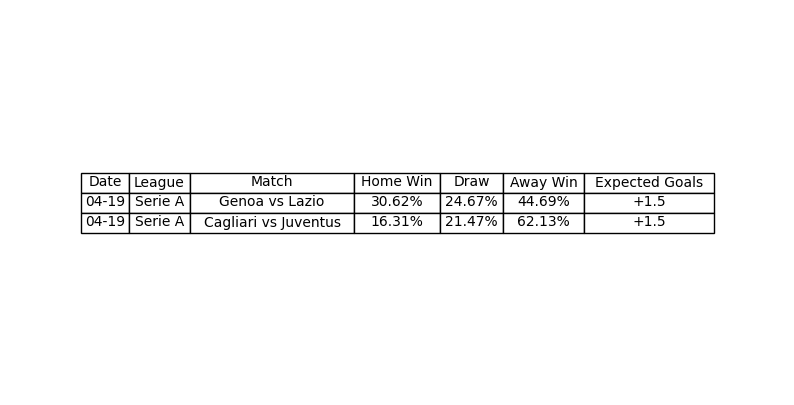

In [127]:
# Create a matplotlib table
fig, ax = plt.subplots(figsize=(10, 5))
table = ax.table(cellText=filtered_df.values, colLabels=filtered_df.columns, loc='center')

# Customize the table appearance
table.auto_set_font_size(False)
table.scale(1.2, 1.2)
table.auto_set_column_width(col=list(range(len(df2))))  # Ajustar el ancho de la columna automáticamente

# Center the cell text and wrap the column width
for cell in table.get_celld().values():
    cell.set_text_props(horizontalalignment='center')
    cell.loc = 'center'

ax.axis('off')

plt.show()